   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


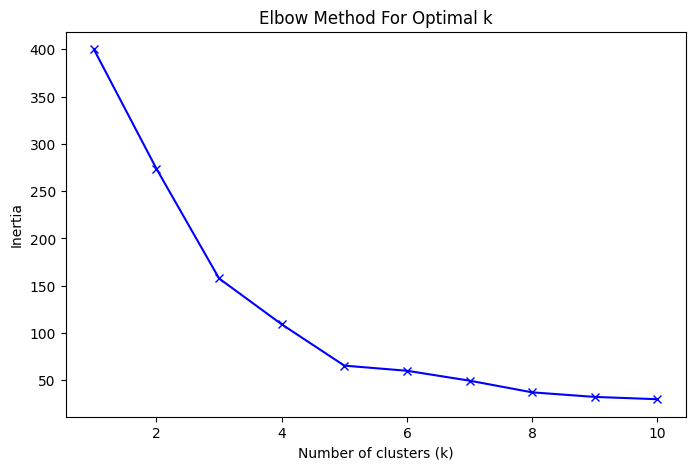

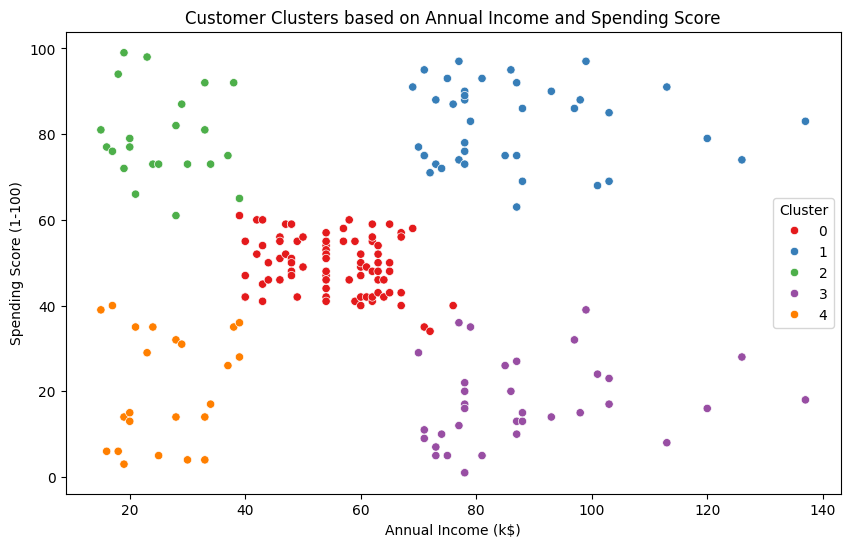

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming your dataset is a CSV file with columns 'Annual Income (k$)' and 'Spending Score (1-100)'
data = pd.read_csv('Mall_Customers.csv')

# Inspect the dataset
print(data.head())

# Preprocessing - Selecting relevant features
# We use 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features (K-means is sensitive to the scale of data)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Testing for k values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the elbow curve, let's say we choose k=5 (you can change based on the elbow point)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.show()

# Analyze the clusters
